Look at ONC patrol data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
import glob
import os

from salishsea_tools import viz_tools

import ONC_patrols as onc


%matplotlib inline

In [2]:
sns.set_color_codes()

In [3]:
grid_B=nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
mesh_mask=nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')

# All the data
Quick look at the data in each file.
* TS diagrams and locations

In [4]:
badQC=[0,3,4,9]

/ocean/nsoontie/MEOPAR/ONC/Patrols/CampbellRiver_Patrol6_CTD_20150219T173754Z_20151005T212156Z-Corrected.csv


/ocean/vdo/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC_patrols.py:77: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data = data.convert_objects(convert_numeric=True)


/ocean/nsoontie/MEOPAR/ONC/Patrols/Lund_PowellRiver_Patrol1_CTD_20150216T164458Z_20151005T193255Z-Corrected.csv
/ocean/nsoontie/MEOPAR/ONC/Patrols/BaynesSound_Patrol4_CTD_20150218T180311Z_20160301T214950Z-Corrected.csv
/ocean/nsoontie/MEOPAR/ONC/Patrols/Victoria_Patrol9_CTD_20150220T182104Z_20151001T195734Z-Corrected.csv
/ocean/nsoontie/MEOPAR/ONC/Patrols/CowichanBay_Patrol10_CTD_20150219T173033Z_20150916T181335Z-Corrected.csv
/ocean/nsoontie/MEOPAR/ONC/Patrols/Lund_PowellRiver_Patrol2_CTD_20150215T162434Z_20151005T224706Z-Corrected.csv
/ocean/nsoontie/MEOPAR/ONC/Patrols/Irvine's_Sechelt_Patrol3_CTD_20150127T170859Z_20151005T213545Z-Corrected.csv
/ocean/nsoontie/MEOPAR/ONC/Patrols/compositeUBC_20160414.csv


AttributeError: 'str' object has no attribute 'year'

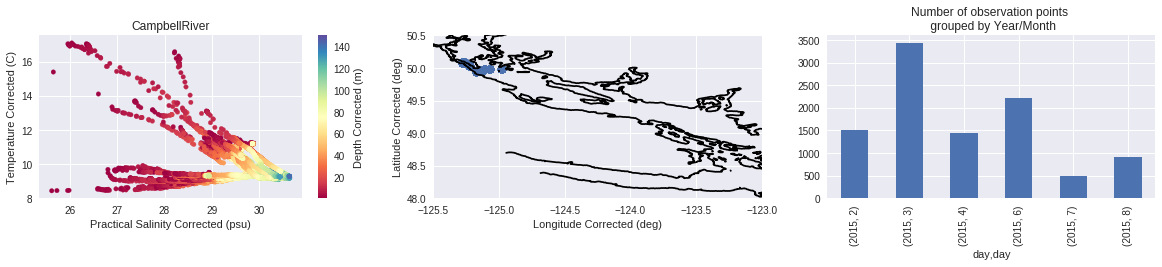

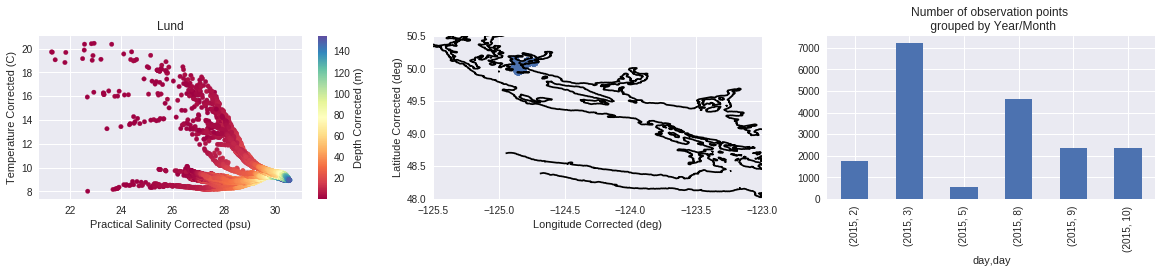

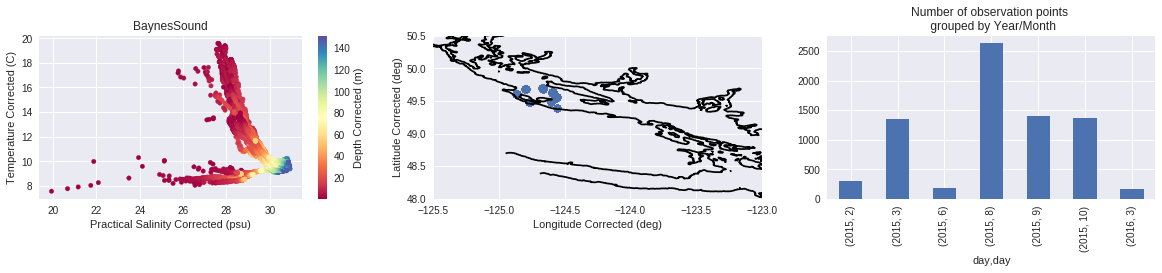

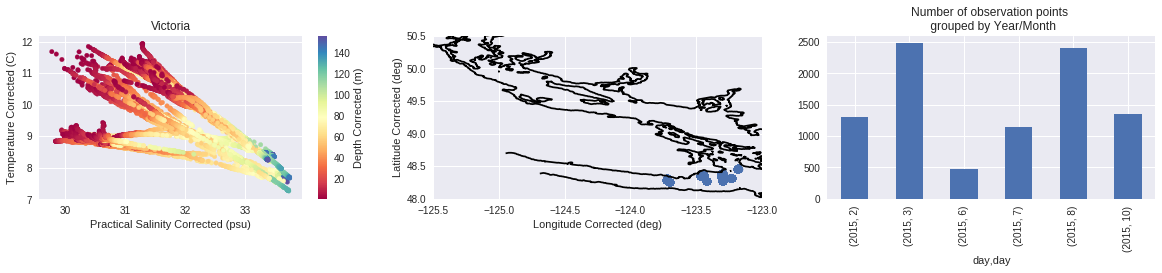

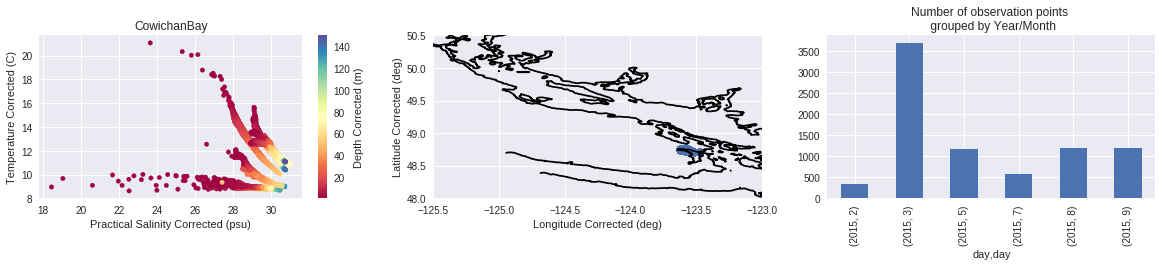

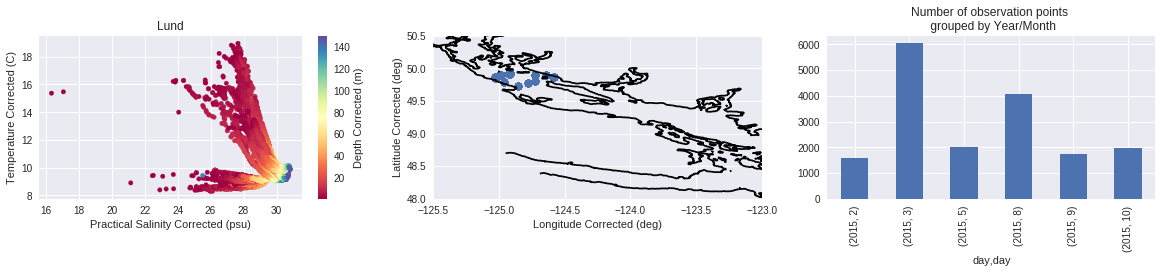

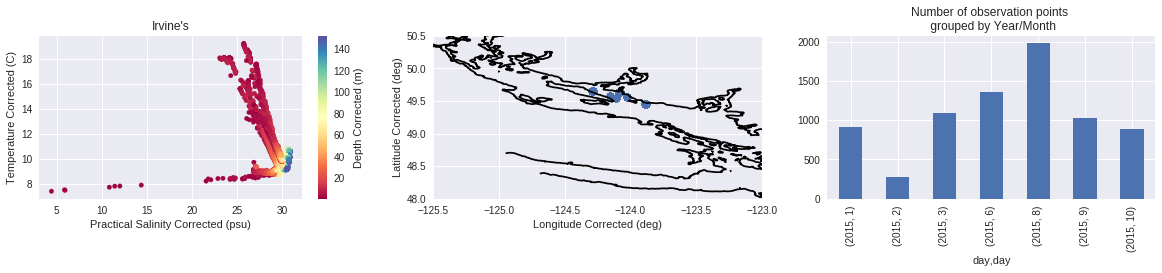

In [5]:
files = glob.glob('/ocean/nsoontie/MEOPAR/ONC/Patrols/*.csv')
for file in files:
    print(file)
    # process data
    data=onc.load_patrol_csv(file)
    data = onc.exclude_bad(data,['Practical Salinity Corrected QC Flag  '], badQC)
    # plot data
    title=os.path.basename(file).split('_')[0]
    fig,axs=plt.subplots(1,3, figsize=(20,3))
    ax=axs[0]
    mesh=data.plot(x='Practical Salinity Corrected (psu)', y='Temperature Corrected (C)',
                   c='Depth Corrected (m)',kind='scatter',ax=ax, cmap='Spectral')
    ax.set_title(title)
    ax=axs[1]
    data.plot(x='Longitude Corrected (deg)', y='Latitude Corrected (deg)',
              kind='scatter',ax=ax,s=50)
    viz_tools.plot_coastline(ax,grid_B,coords='map')
    ax.set_xlim([-125.5,-123])
    ax.set_ylim([48,50.5])
    
    ax=axs[2]
    dday=data['day']
    dday.groupby([dday.dt.year, dday.dt.month]).count().plot(kind="bar",ax=ax)
    ax.set_title('Number of observation points \n grouped by Year/Month')

# Victoria

In [6]:
csvfile = "/ocean/nsoontie/MEOPAR/ONC/Patrols/Victoria_Patrol9_CTD_20150220T182104Z_20151001T195734Z-Corrected.csv"
data=onc.load_patrol_csv(csvfile)
data = onc.exclude_bad(data,['Practical Salinity Corrected QC Flag  '], badQC)
data = onc.divide_into_casts(data)

/ocean/vdo/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC_patrols.py:77: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data = data.convert_objects(convert_numeric=True)


TypeError: unhashable type: 'MaskedArray'

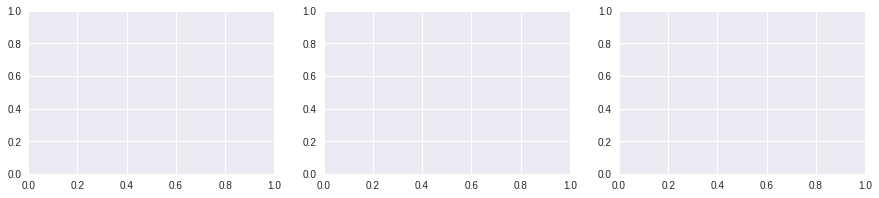

In [7]:
names={'obs': 'Practical Salinity Corrected (psu)',
       'model': 'vosaline'}
onc.compare_patrol_model_obs(data, names, grid_B, mesh_mask, var_lims=[28,34])

Do we have some kind of a seasonal bias?
* Surface is too fresh in the summer
* Deep is generally too fresh.
* March looks really good
* Feb is too salty in surface, too fresh at deep in the SJDF and too salty in Haro.

TypeError: unhashable type: 'MaskedArray'

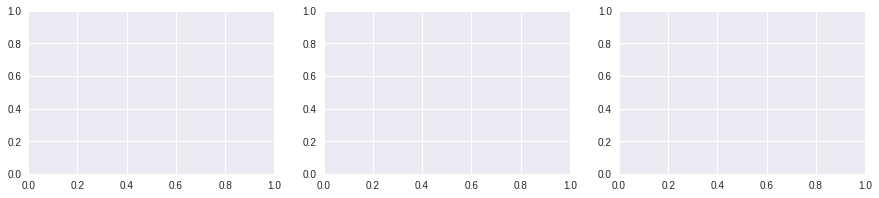

In [8]:
names={'obs': 'Temperature Corrected (C)',
       'model': 'votemper'}
onc.compare_patrol_model_obs(data, names, grid_B, mesh_mask, var_lims=[7,13])

# Steveston

In [9]:
csvfile = "/ocean/nsoontie/MEOPAR/ONC/Patrols/Steveston_Patrol8_CTD_20150525T171143Z_20151005T222329Z-Corrected.csv"
data=onc.load_patrol_csv(csvfile)
data = onc.exclude_bad(data,['Practical Salinity Corrected QC Flag  '], badQC)
data = onc.divide_into_casts(data)

/ocean/vdo/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC_patrols.py:77: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data = data.convert_objects(convert_numeric=True)


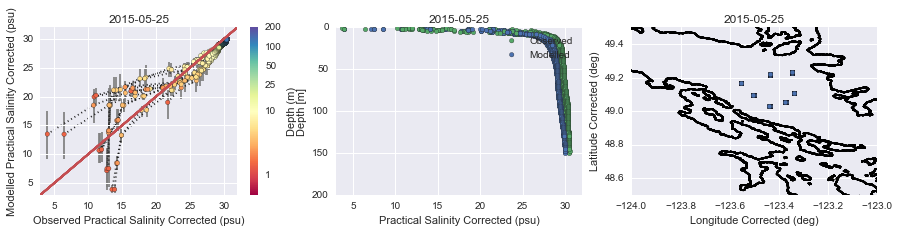

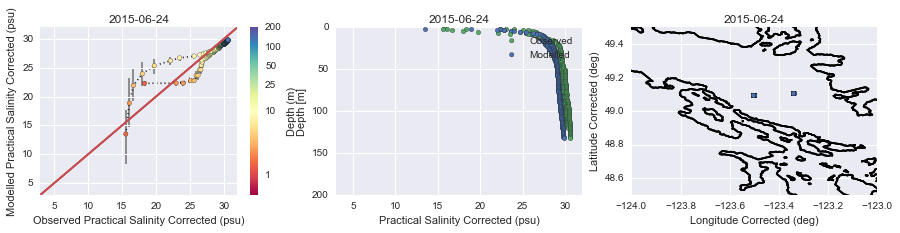

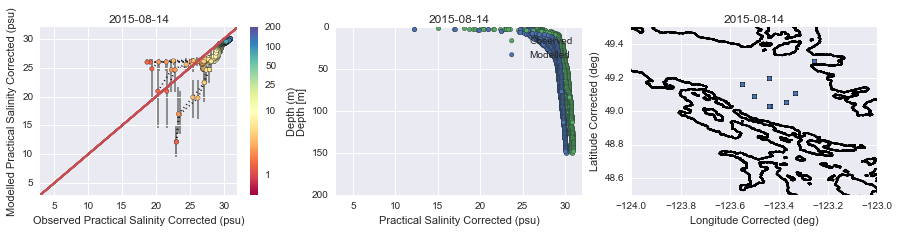

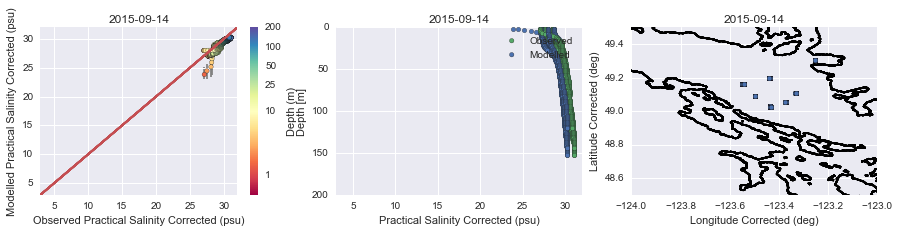

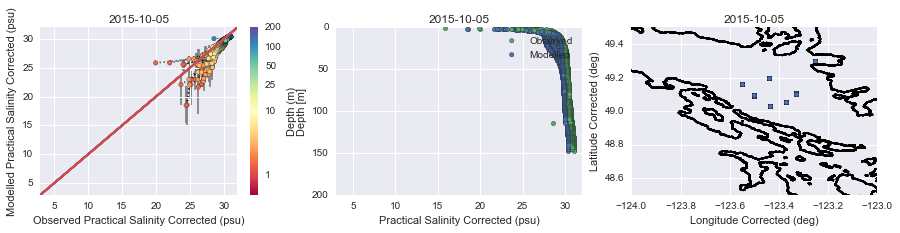

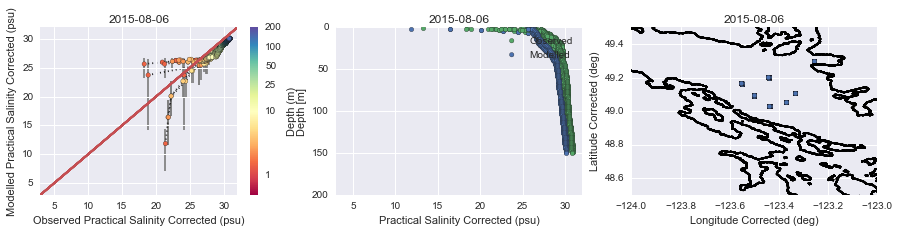

In [10]:
names={'obs': 'Practical Salinity Corrected (psu)',
       'model': 'vosaline'}
onc.compare_patrol_model_obs(data, names, grid_B, mesh_mask, var_lims=[3,32],
                            ylims=[48.5,49.5], depth_lims=[0,200])

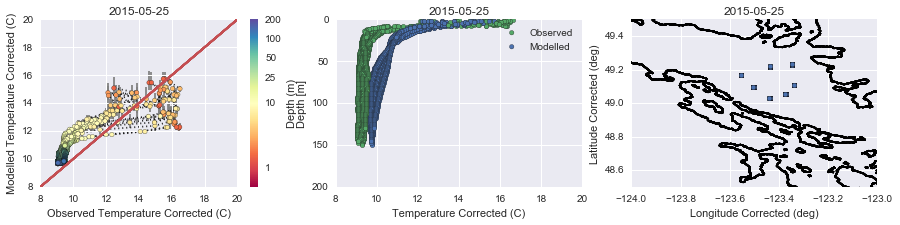

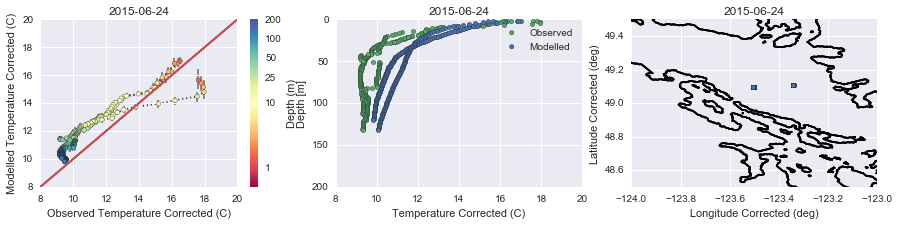

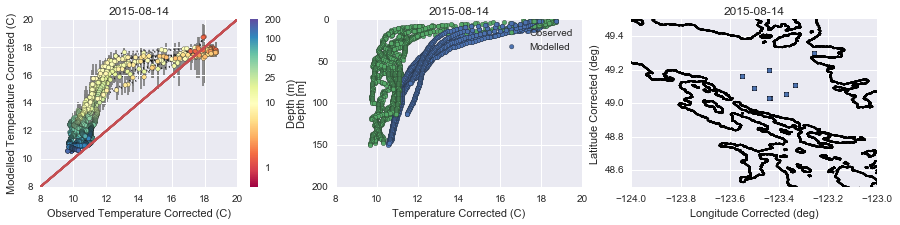

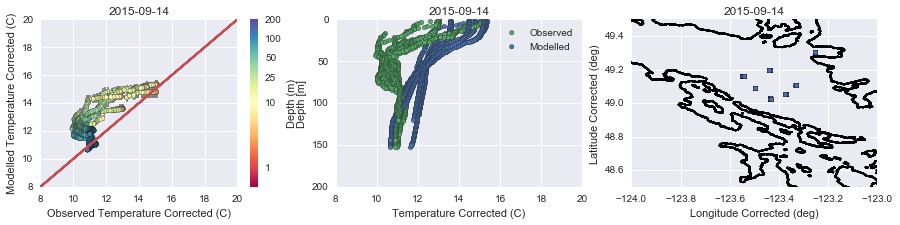

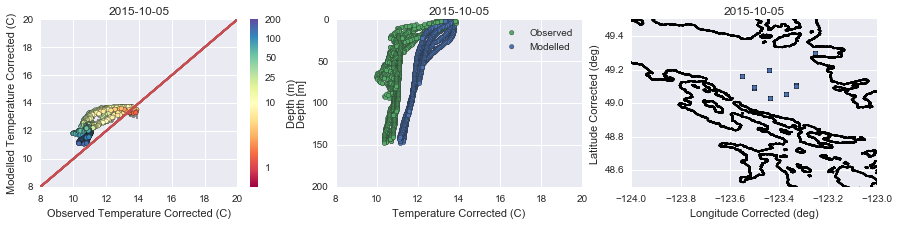

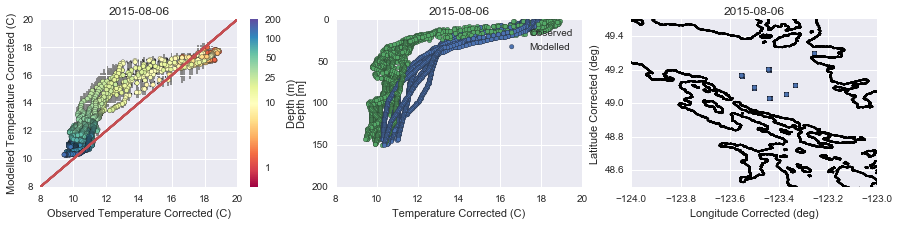

In [11]:
names={'obs': 'Temperature Corrected (C)',
       'model': 'votemper'}
onc.compare_patrol_model_obs(data, names, grid_B, mesh_mask, var_lims=[8,20],
                            ylims=[48.5,49.5], depth_lims=[0,200])

# Galiano

In [12]:
csvfile ="/ocean/nsoontie/MEOPAR/ONC/Patrols/GalianoIsland_Patrol9_CTD_20160303T211549Z_20160304T010923Z-Corrected.csv"
data=onc.load_patrol_csv(csvfile)
data = onc.exclude_bad(data,['Practical Salinity Corrected QC Flag  '], badQC)
data = onc.divide_into_casts(data)

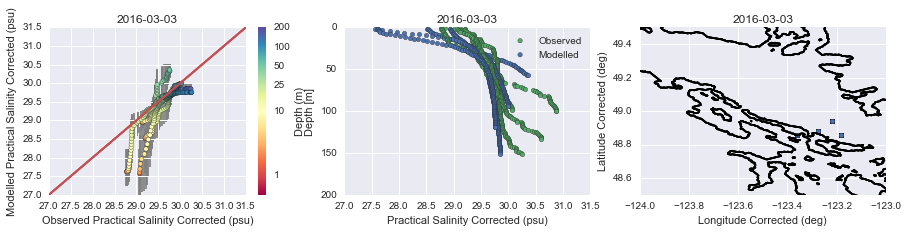

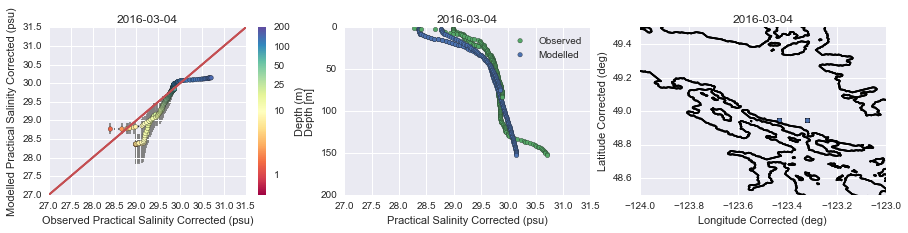

In [13]:
names={'obs': 'Practical Salinity Corrected (psu)',
       'model': 'vosaline'}
onc.compare_patrol_model_obs(data, names, grid_B, mesh_mask, var_lims=[27,31.5],
                            ylims=[48.5,49.5], depth_lims=[0,200])

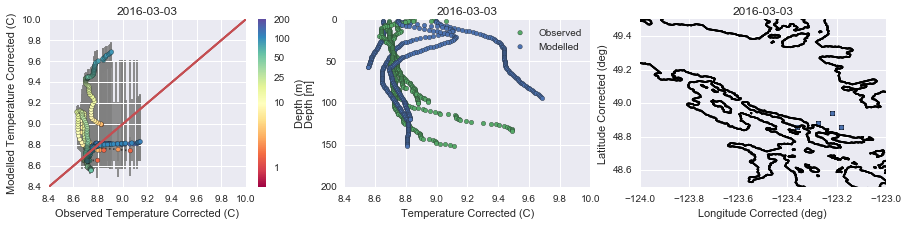

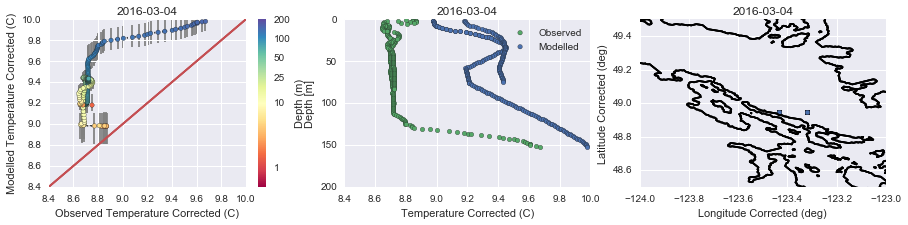

In [14]:
names={'obs': 'Temperature Corrected (C)',
       'model': 'votemper'}
onc.compare_patrol_model_obs(data, names, grid_B, mesh_mask, var_lims=[8.4,10],
                            ylims=[48.5,49.5], depth_lims=[0,200])

# Nanaimo

In [15]:
csvfile ="/ocean/nsoontie/MEOPAR/ONC/Patrols/Nanaimo_Qualicum_Patrol5_CTD_20150220T163040Z_20151005T204619Z-Corrected.csv"
data=onc.load_patrol_csv(csvfile)
data = onc.exclude_bad(data,['Practical Salinity Corrected QC Flag  '], badQC)
data = onc.divide_into_casts(data)

No Model Point for -124.35768553691273 49.38875197986576


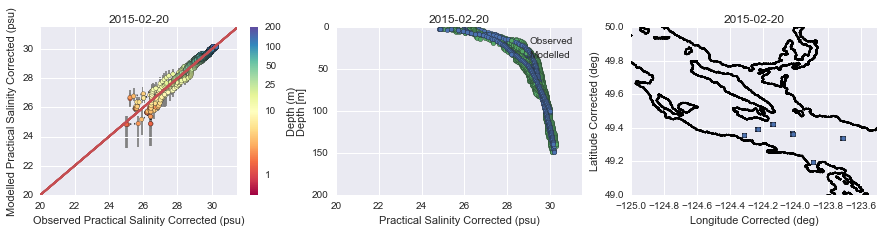

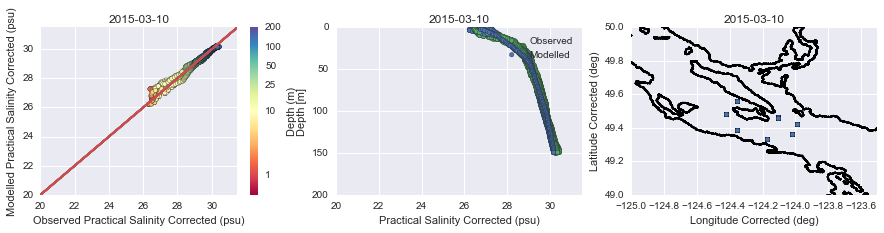

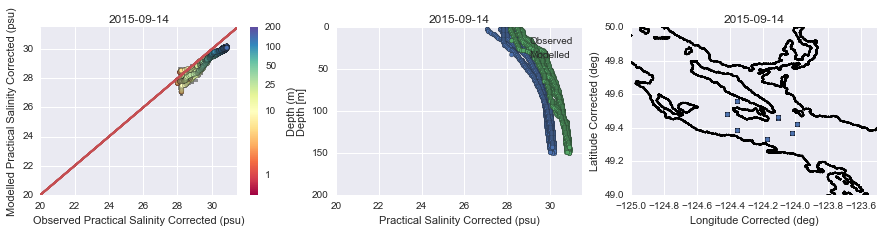

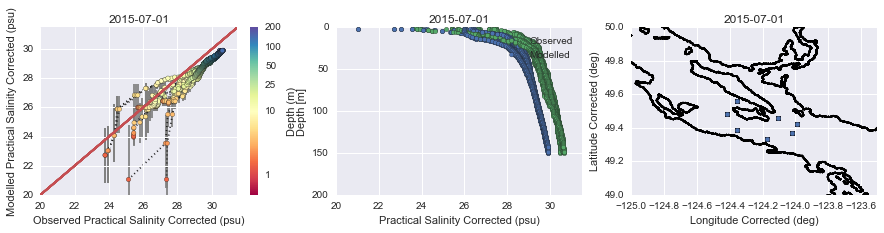

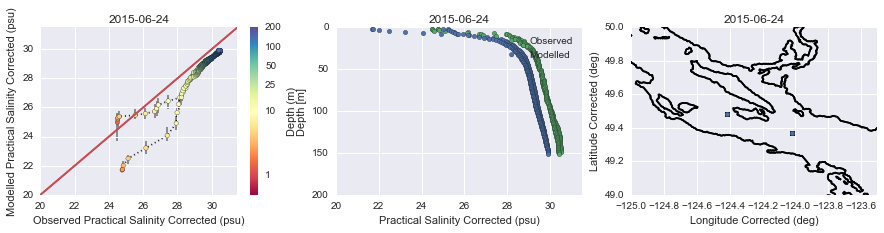

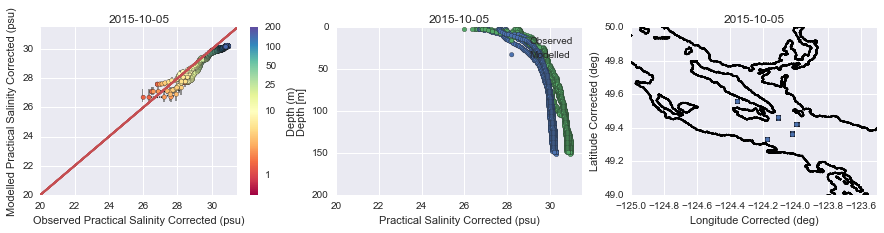

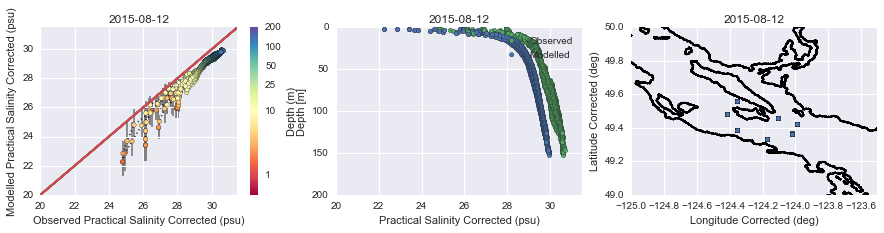

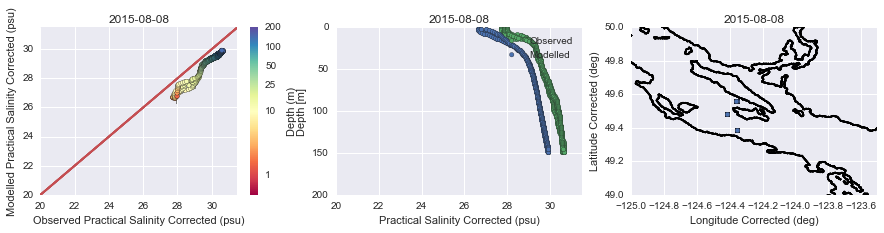

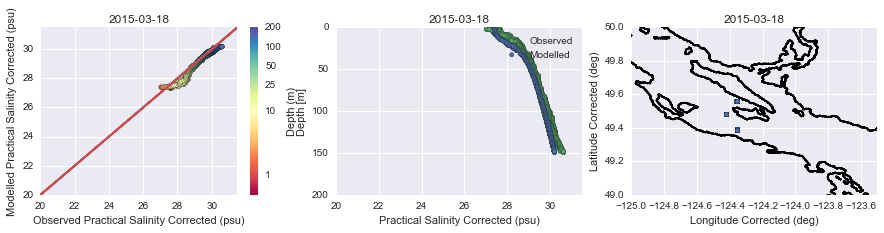

In [16]:
names={'obs': 'Practical Salinity Corrected (psu)',
       'model': 'vosaline'}
onc.compare_patrol_model_obs(data, names, grid_B, mesh_mask, var_lims=[20,31.5],xlims=[-125,-123.5],
                            ylims=[49,50], depth_lims=[0,200])

* Really good in the spring!!
* Generally too fresh in summer/fall, especially at depth but also sometimes in near the surface.

Why do all the observations cut off at 150 m? Is it the quality control flag? No, they just didn't sample that deep.

# Ideas for analysis
* Monthly skill scores grouped by regions and/or depth ranges 
* There seems to be a seasonal trend in the model error. What can that tell us about our fresh water budget etc.
* Model TS diagrams compared to observed TS diagrams.